## 전체 코드

### 이미지 가져오기

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import time

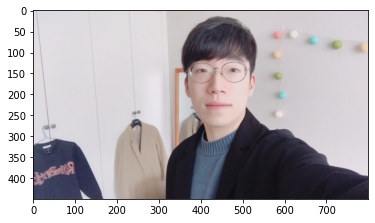

In [16]:
img_path = 'images/image.png'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()

plt.imshow(img_rgb)
plt.show()

### 이미지 피라미드 수에 따른 검출 차이
- detect_face 함수 제작
- n = 1,2,3,4 (5 이상부터는 timeout으로 체크 불가)

In [17]:
# face detector 호출
detector_hog = dlib.get_frontal_face_detector()

In [18]:
# face detector ()
def detect_face(img, detector, n=1, rect_color=(0,255,0)):
    start = time.time()
    dlib_rects = detector(img, n)
    end = time.time()
    
    print(dlib_rects)
    print(f"{end - start:.3f} sec")
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img, (l,t), (r,b), rect_color, 2, lineType=cv2.LINE_AA)

    plt.imshow(img)
    plt.show()
    
    return dlib_rects

rectangles[[(345, 98) (531, 284)]]
0.238 sec


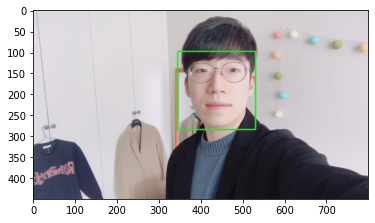

In [19]:
dlib_rects = detect_face(img=img_show, detector=detector_hog, n=1)

rectangles[[(351, 102) (512, 263)]]
0.940 sec


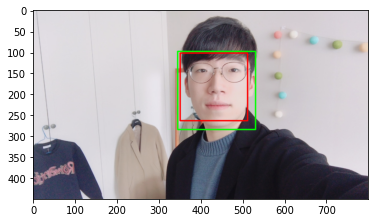

In [20]:
dlib_rects = detect_face(img=img_show, detector=detector_hog, n=2, rect_color=(255,0,0))

In [21]:
#dlib_rects = detect_face(img=img_show, detector=detector_hog, n=3, rect_color=(255,0,255))

In [22]:
#dlib_rects = detect_face(img=img_show, detector=detector_hog, n=4, rect_color=(0,0,255))

실행시간
- n=1) 0.246
- n=2) 1.042
- n=3) 3.934
- n=4) 16.458

검출 영역
- n=1~4까지 모두 다름
- 하지만 3~4로 갈수록 얼굴외곽에 딱 맞는 detection을 보여주는 듯 함

### 영역 내 Face Landmark 출력

In [23]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [24]:
# 각 랜드마크의 위치를 리스트에 저장
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(list_landmarks[0])

[(366, 156), (367, 176), (371, 195), (375, 215), (381, 234), (389, 251), (402, 266), (418, 277), (439, 280), (459, 277), (478, 268), (494, 255), (507, 238), (515, 219), (520, 197), (521, 175), (521, 152), (376, 134), (384, 126), (397, 124), (409, 126), (420, 130), (450, 128), (462, 122), (476, 119), (489, 120), (501, 127), (436, 145), (437, 158), (437, 171), (437, 184), (424, 198), (431, 199), (438, 201), (446, 199), (453, 197), (391, 147), (399, 142), (409, 142), (417, 149), (409, 150), (399, 150), (462, 148), (470, 141), (480, 141), (488, 145), (481, 149), (471, 149), (411, 227), (420, 222), (431, 219), (438, 221), (446, 219), (459, 222), (471, 227), (458, 234), (446, 238), (437, 238), (430, 238), (420, 235), (415, 228), (431, 227), (438, 227), (446, 227), (467, 227), (445, 228), (437, 228), (430, 228)]


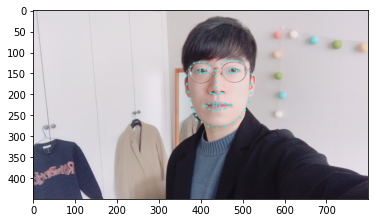

In [25]:
# 랜드마크 위치를 이미지에 점으로 표시
img_show_rgb = img_rgb.copy()

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_rgb, point, 2, (0,255,255), -1)
        

plt.imshow(img_show_rgb)
plt.show()

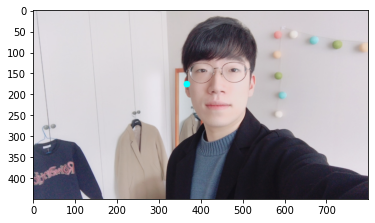

In [26]:
# 1번 랜드마크
img_show_rgb = img_rgb.copy()

cv2.circle(img_show_rgb, list_landmarks[0][1], 8, (0,255,255), -1)
plt.imshow(img_show_rgb)
plt.show()

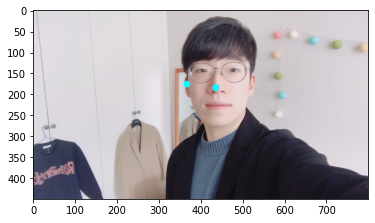

In [27]:
# 30번 랜드마크
cv2.circle(img_show_rgb, list_landmarks[0][30], 8, (0,255,255), -1)
plt.imshow(img_show_rgb)
plt.show()

### 이미지의 알맞는 위치에 스티커 추가
- 콧등 위치인 30번에 스티커 추가

In [28]:
# 랜드마크 30번 및 얼굴 인식 범위 특정
img_show_rgb = img_rgb.copy()

x,y = list_landmarks[0][30]
w = dlib_rects[0].width()
h = dlib_rects[0].height()

print(x,y)
print(w,h)

437 184
162 162


#### 스티커 추가

(162, 162, 3)


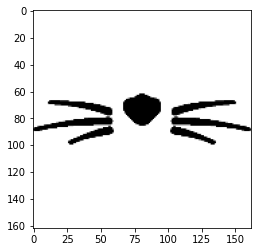

In [29]:
# 스티커 가져오기
sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [30]:
# 스티커 위치 조정을 위한 계산
refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (356,103)


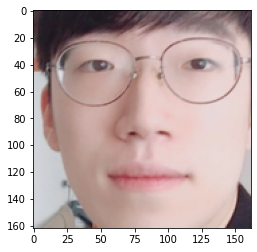

In [31]:
# 스티커가 들어갈 범위 설정
sticker_area = img_show_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

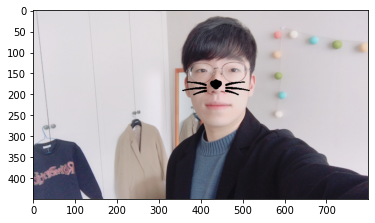

In [32]:
# 스티커가 들어갈 범위에 스티커 사진을 넣을지 원본 이미지를 넣을지 설정
img_show_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)
plt.imshow(img_show_rgb)
plt.show()

## Custom

### 얼굴 바꾸고 실습

In [33]:
img_origin = cv2.imread('images/6.jpg')
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_copy = img_origin.copy()

img_sticker = cv2.imread('images/cat-whiskers.png')

detector_hog = dlib.get_frontal_face_detector()

model_path = 'models/shape_predictor_68_face_landmarks.dat'

rectangles[[(200, 260) (468, 528)]]
0.359 sec


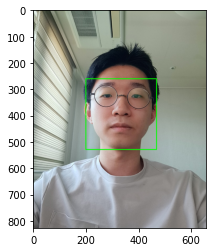

In [34]:
dlib_rects = detect_face(img=img_copy, detector=detector_hog, n=1)

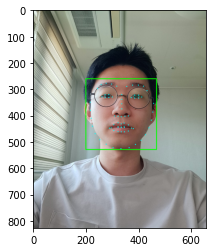

In [35]:
#img_copy = img_origin.copy()
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_copy, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_copy, point, 2, (0,255,255), -1)
        
plt.imshow(img_copy)
plt.show()

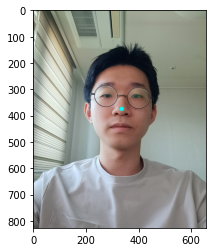

In [36]:
img_copy = img_origin.copy()

cv2.circle(img_copy, list_landmarks[0][30], 8, (0,255,255), -1)
plt.imshow(img_copy)
plt.show()

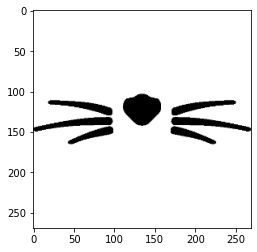

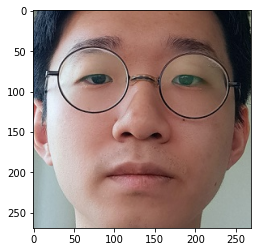

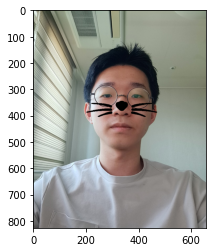

In [37]:
img_copy = img_origin.copy()

x,y = list_landmarks[0][30]
w = dlib_rects[0].width()
h = dlib_rects[0].height()

img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(img_copy)
plt.show()

### 얼굴 각도가 다른 이미지

In [38]:
img_origin = cv2.imread('images/7.jpg')
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_copy = img_origin.copy()

img_sticker = cv2.imread('images/cat-whiskers.png')

detector_hog = dlib.get_frontal_face_detector()

model_path = 'models/shape_predictor_68_face_landmarks.dat'

rectangles[[(230, 171) (498, 439)]]
0.330 sec


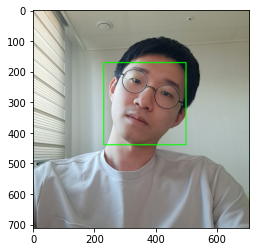

In [39]:
dlib_rects = detect_face(img=img_copy, detector=detector_hog, n=1)

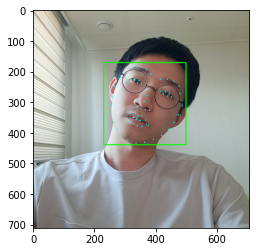

In [40]:
#img_copy = img_origin.copy()
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_copy, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_copy, point, 2, (0,255,255), -1)
        
plt.imshow(img_copy)
plt.show()

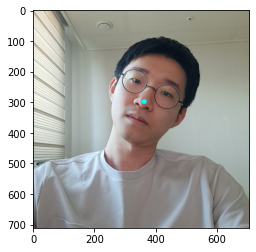

In [41]:
img_copy = img_origin.copy()

cv2.circle(img_copy, list_landmarks[0][30], 8, (0,255,255), -1)
plt.imshow(img_copy)
plt.show()

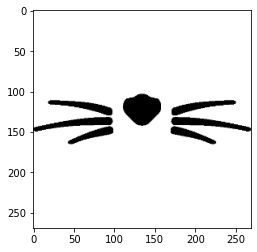

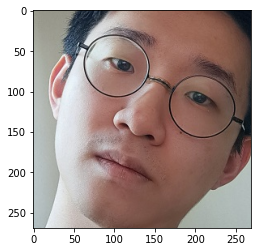

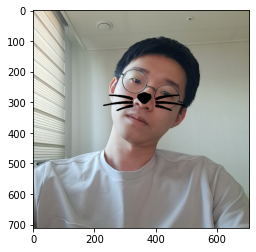

In [42]:
img_copy = img_origin.copy()

x,y = list_landmarks[0][30]
w = dlib_rects[0].width()
h = dlib_rects[0].height()

img_sticker = cv2.resize(img_sticker, (w,h))
#img_sticker = cv2.bitwise_not(img_sticker)
plt.imshow(img_sticker)
plt.show()

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(img_copy)
plt.show()

#### 얼굴 각도에 맞게 스티커를 수정하려면?
> 참고사이트  
> [링크](https://velog.io/@dldndyd01/OpenCV-%EC%9D%B4%EB%AF%B8%EC%A7%80-%ED%9A%8C%EC%A0%84%EC%A4%91%EC%95%99-%EA%B8%B0%EC%A4%80-%ED%9A%8C%EC%A0%84-cv2.getRotationMatrix2D-%EC%96%BC%EA%B5%B4-%ED%9A%8C%EC%A0%84-%EA%B0%81%EB%8F%84-%EA%B5%AC%ED%95%98%EA%B8%B0)

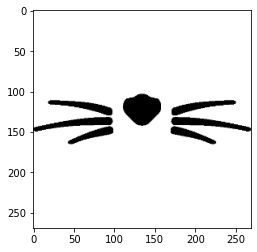

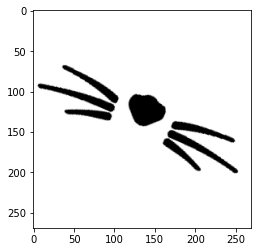

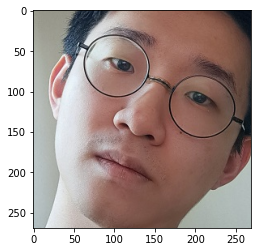

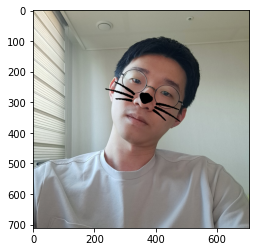

In [43]:
img_copy = img_origin.copy()

x,y = list_landmarks[0][30]
w = dlib_rects[0].width()
h = dlib_rects[0].height()

img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()

refined_x = x - w//2
refined_y = y - h//2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
# [custom start]
# 랜드마크 27번을 이용하여 각도 계산
# tan_theta -> theta -> angle(각도)
import math
x_27, y_27 = list_landmarks[0][27]
tan_theta = (x-x_27) / (y-y_27)
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi

# 중앙을 기준으로 angle(각도)만큼 회전
# borderValue : 이미지를 회전하면서 생긴 빈 부분을 채울 pixel값
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), rotate_angle, 1.0)
img_sticker_rotated = cv2.warpAffine(img_sticker, M, (w, h), flags=cv2.INTER_LINEAR, borderValue=(255,255,255))
plt.imshow(img_sticker_rotated)
plt.show()
# [custom end]

img_sticker = img_sticker_rotated.copy()
sticker_area = img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(sticker_area)
plt.show()

img_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(img_copy)
plt.show()

## 회고

### opencv
- opencv 코드를 다시 한번 사용
- 여러가지 이미지 왜곡 방법을 새로 알게됨
    - remapping을 이용한 다양한 왜곡 방법 해보기 

### dlib
- dlib을 이용한 얼굴 인식으로 프로젝트 해볼거 생각해보기